In [1]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *
import scipy.io as sc
import scipy.signal as sig

In [3]:
def db(x):
    return 20*np.log10(x)

def linear(x):
    return 10**(x/20)


def w0_from_S21(S21, w, prominence):
    dip , _ = sig.find_peaks(-S21, prominence = prominence)
    w0 = w[dip[0]]
    return w0



## MWO


In [19]:
path = r'D:\AWR-MWO\202509-GeRes-Al'
file_list = os.listdir(path)
print(file_list)
d = {}

# Load the data
for file in file_list[1:-1]:
    name = file.split('.')
    if name[1] != 'mat':
        continue
    name = name[0]
    file_path = os.path.join(path, file)
    mat_contents = sc.loadmat(file_path)
    freq = mat_contents['X\x00\x00\x00\x00\x00\x00\x00'][0]
    amp = mat_contents['Y\x00\x00\x00\x00\x00\x00\x00'][0]    
    d[name] = {'freq': freq, 'amp': amp}

print(d.keys())

['DATA_SETS', 'GeRes-Al-0p6-v4.emp', 'GeRes-Al-0p6-v4.vin', 'GeRes-GeSubs-Al-v4.mat', 'GeRes-SiSubs-Al-0p6-v4.emp', 'GeRes-SiSubs-Al-0p6-v4.vin', 'GeRes-SiSubs-Al-v4.mat', 'TEMP']
dict_keys(['GeRes-GeSubs-Al-v4', 'GeRes-SiSubs-Al-v4'])


In [ ]:
def cut_off(data, f_min, f_max):
    mask = (data['freq'] >= f_min) & (data['freq'] <= f_max)
    return {'freq': data['freq'][mask], 'amp': data['amp'][mask]}

# d['GeRes-SiSubs-Al-v4'] = cut_off(d['GeRes-SiSubs-Al-v4'], 4.8e9, 5.2e9)

C:\Users\localadmin\AppData\Local\Temp\ipykernel_11028\1580762699.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = np.arange(-9,0.1,1),fontsize=12)
C:\Users\localadmin\AppData\Local\Temp\ipykernel_11028\1580762699.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = np.arange(4,8.1,0.5),fontsize=12)


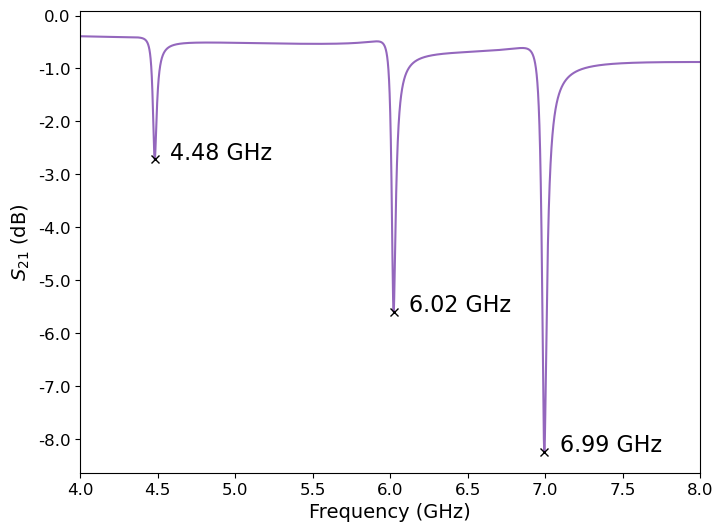

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)
name = 'GeRes-SiSubs-Al-v4'

f0_si = []
ax.plot(d[name]['freq']*1e-9, d[name]['amp']-0.15, color ='tab:purple')
peak, _ = sig.find_peaks(-d[name]['amp'], prominence = 1)
f0 = d[name]['freq'][peak]*1e-9
f0_si.append(f0[0])
f0_si.append(f0[1])
ax.plot(d[name]['freq'][peak]*1e-9, d[name]['amp'][peak]-0.15, 'x', color='black')
ax.text(d[name]['freq'][peak[0]]*1e-9+0.1, d[name]['amp'][peak[0]]-0.15, f'{f0[0]:.2f} GHz', fontsize=16, color='black')
ax.text(d[name]['freq'][peak[1]]*1e-9+0.1, d[name]['amp'][peak[1]]-0.15, f'{f0[1]:.2f} GHz', fontsize=16, color='black')
ax.text(d[name]['freq'][peak[2]]*1e-9+0.1, d[name]['amp'][peak[2]]-0.15, f'{f0[2]:.2f} GHz', fontsize=16, color='black')



# ax.set_title('Si substrate')
ax.set_xlabel('Frequency (GHz)', fontsize=14)
ax.set_ylabel('$S_{21}$ (dB)', fontsize=14)
ax.set_xlim(4, 8)
ax.set_yticklabels(labels = np.arange(-9,0.1,1),fontsize=12)
ax.set_xticklabels(labels = np.arange(4,8.1,0.5),fontsize=12)
plt.savefig(r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\gonogo-pics\wb\si_subs_sim.png', dpi=300)


C:\Users\localadmin\AppData\Local\Temp\ipykernel_11028\3204413527.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = np.arange(-2,0.24,0.25),fontsize=12)
C:\Users\localadmin\AppData\Local\Temp\ipykernel_11028\3204413527.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = np.arange(3.5,7.6,0.5),fontsize=12)


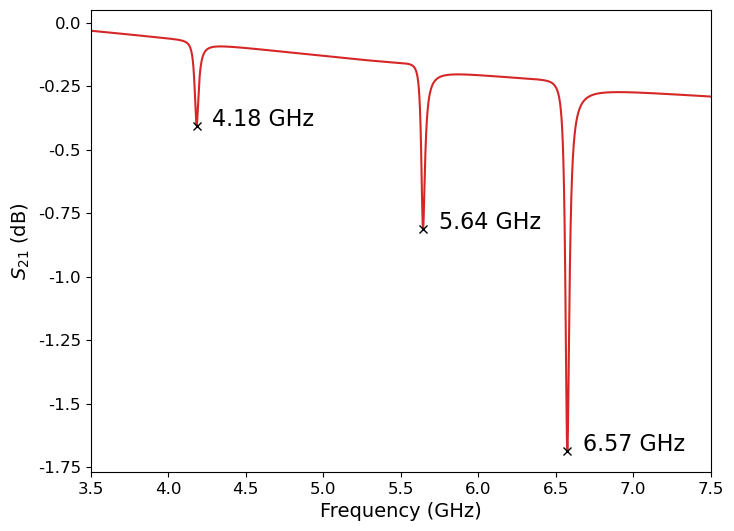

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)
name = 'GeRes-GeSubs-Al-v4'

f0_si = []
ax.plot(d[name]['freq']*1e-9, d[name]['amp']-0.15, color ='tab:red')
peak, _ = sig.find_peaks(-d[name]['amp'], prominence = 0.25
                         )
f0 = d[name]['freq'][peak]*1e-9
f0_si.append(f0[0])
f0_si.append(f0[1])
ax.plot(d[name]['freq'][peak]*1e-9, d[name]['amp'][peak]-0.15, 'x', color='black')
ax.text(d[name]['freq'][peak[0]]*1e-9+0.1, d[name]['amp'][peak[0]]-0.15, f'{f0[0]:.2f} GHz', fontsize=16, color='black')
ax.text(d[name]['freq'][peak[1]]*1e-9+0.1, d[name]['amp'][peak[1]]-0.15, f'{f0[1]:.2f} GHz', fontsize=16, color='black')
ax.text(d[name]['freq'][peak[2]]*1e-9+0.1, d[name]['amp'][peak[2]]-0.15, f'{f0[2]:.2f} GHz', fontsize=16, color='black')



# ax.set_title('Si substrate')
ax.set_xlabel('Frequency (GHz)', fontsize=14)
ax.set_ylabel('$S_{21}$ (dB)', fontsize=14)
ax.set_xlim(3.5, 7.5)
ax.set_yticklabels(labels = np.arange(-2,0.24,0.25),fontsize=12)
ax.set_xticklabels(labels = np.arange(3.5,7.6,0.5),fontsize=12)
plt.savefig(r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\gonogo-pics\wb\ge_subs_sim.png', dpi=300)


In [5]:
path = r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\Sim-data-Al\mwo\new-diel'
file_list = os.listdir(path)
print(file_list)
d = {}

# Load the data
for file in file_list:
    name = file.split('.')
    if name[1] != 'mat':
        continue
    print(name[0])
    name = name[0]
    file_path = os.path.join(path, file)
    mat_contents = sc.loadmat(file_path)
    freq = mat_contents['X\x00\x00\x00\x00\x00\x00\x00'][0]
    amp = mat_contents['Y\x00\x00\x00\x00\x00\x00\x00'][0]    
    d[name] = {'freq': freq, 'amp': amp}

print(d.keys())

['0p6-1-ge-hetero-sigma.mat', '0p6-1-ge-hetero.mat', '0p6-1-Ge-sub.mat', '0p6-1-si-hetero.mat', '0p6-1-Si.mat', '0p6-1-sigma.mat', '0p6-2-ge-hetero-sigma.mat', '0p6-2-ge-hetero.mat', '0p6-2-Ge-sub.mat', '0p6-2-si-hetero.mat', '0p6-2-Si.mat', '0p6-2-sigma.mat']
0p6-1-ge-hetero-sigma
0p6-1-ge-hetero
0p6-1-Ge-sub
0p6-1-si-hetero
0p6-1-Si
0p6-1-sigma
0p6-2-ge-hetero-sigma
0p6-2-ge-hetero
0p6-2-Ge-sub
0p6-2-si-hetero
0p6-2-Si
0p6-2-sigma
dict_keys(['0p6-1-ge-hetero-sigma', '0p6-1-ge-hetero', '0p6-1-Ge-sub', '0p6-1-si-hetero', '0p6-1-Si', '0p6-1-sigma', '0p6-2-ge-hetero-sigma', '0p6-2-ge-hetero', '0p6-2-Ge-sub', '0p6-2-si-hetero', '0p6-2-Si', '0p6-2-sigma'])


In [6]:
def cut_off(data, f_min, f_max):
    mask = (data['freq'] >= f_min) & (data['freq'] <= f_max)
    return {'freq': data['freq'][mask], 'amp': data['amp'][mask]}

d['0p6-1-ge-hetero'] = cut_off(d['0p6-1-ge-hetero'], 5.5e9, 8e9)
d['0p6-1-Ge-sub'] = cut_off(d['0p6-1-Ge-sub'], 5.5e9, 8e9)
d['0p6-1-Si'] = cut_off(d['0p6-1-Si'], 6e9, 8e9)
d['0p6-2-ge-hetero'] = cut_off(d['0p6-2-ge-hetero'], 4e9, 5.5e9)
d['0p6-2-Ge-sub'] = cut_off(d['0p6-2-Ge-sub'], 4e9, 5.5e9)
d['0p6-2-Si'] = cut_off(d['0p6-2-Si'], 4e9, 6e9)
d['0p6-1-sigma'] = cut_off(d['0p6-1-sigma'], 5.5e9, 8e9)
d['0p6-2-sigma'] = cut_off(d['0p6-2-sigma'], 4e9, 5.5e9)
d['0p6-1-ge-hetero-sigma'] = cut_off(d['0p6-1-ge-hetero-sigma'], 5.5e9, 8e9)
d['0p6-2-ge-hetero-sigma'] = cut_off(d['0p6-2-ge-hetero-sigma'], 4e9, 5.5e9)
d['0p6-1-si-hetero'] = cut_off(d['0p6-1-si-hetero'], 6e9, 8e9)
d['0p6-2-si-hetero'] = cut_off(d['0p6-2-si-hetero'], 4e9, 6e9)



In [152]:
np.arange(-25,0,5)

array([-25, -20, -15, -10,  -5])

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\935502814.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = np.arange(-30,0.1,5),fontsize=12)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\935502814.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = np.arange(4,8.1,0.5),fontsize=12)


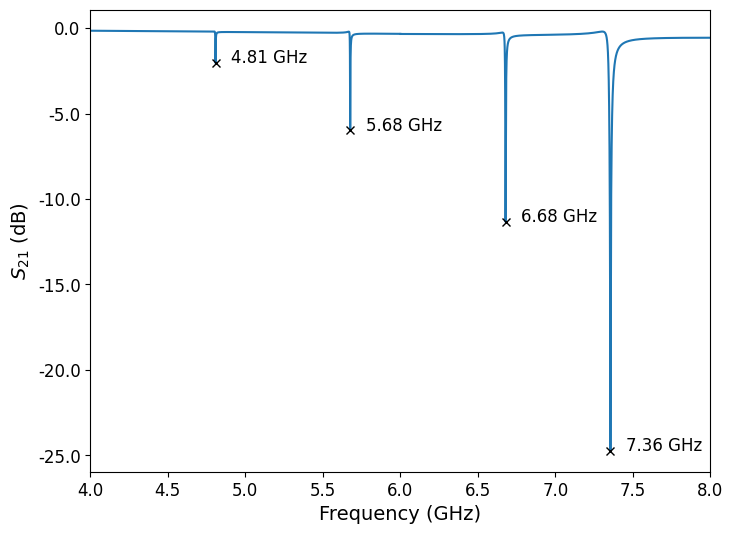

In [221]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)

f0_si = []
ax.plot(d['0p6-1-Si']['freq']*1e-9, d['0p6-1-Si']['amp']-0.15, color ='tab:blue')
peak, _ = sig.find_peaks(-d['0p6-1-Si']['amp'], prominence = 1)
f0 = d['0p6-1-Si']['freq'][peak]*1e-9
f0_si.append(f0[0])
f0_si.append(f0[1])
ax.plot(d['0p6-1-Si']['freq'][peak]*1e-9, d['0p6-1-Si']['amp'][peak]-0.15, 'x', color='black')
ax.text(d['0p6-1-Si']['freq'][peak[0]]*1e-9+0.1, d['0p6-1-Si']['amp'][peak[0]]-0.15, f'{f0[0]:.2f} GHz', fontsize=12, color='black')
ax.text(d['0p6-1-Si']['freq'][peak[1]]*1e-9+0.1, d['0p6-1-Si']['amp'][peak[1]]-0.15, f'{f0[1]:.2f} GHz', fontsize=12, color='black')

ax.plot(d['0p6-2-Si']['freq']*1e-9, d['0p6-2-Si']['amp'], color ='tab:blue')
peak, _ = sig.find_peaks(-d['0p6-2-Si']['amp'], prominence = 1)
f0 = d['0p6-2-Si']['freq'][peak]*1e-9
f0_si.append(f0[0])
f0_si.append(f0[1])
ax.plot(d['0p6-2-Si']['freq'][peak]*1e-9, d['0p6-2-Si']['amp'][peak], 'x', color='black')
ax.text(d['0p6-2-Si']['freq'][peak[0]]*1e-9+0.1, d['0p6-2-Si']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=12, color='black')
ax.text(d['0p6-2-Si']['freq'][peak[1]]*1e-9+0.1, d['0p6-2-Si']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=12, color='black')
# ax.set_title('Si substrate')
ax.set_xlabel('Frequency (GHz)', fontsize=14)
ax.set_ylabel('$S_{21}$ (dB)', fontsize=14)
ax.set_xlim(4, 8)
ax.set_yticklabels(labels = np.arange(-30,0.1,5),fontsize=12)
ax.set_xticklabels(labels = np.arange(4,8.1,0.5),fontsize=12)
plt.savefig(r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\gonogo-pics\si_subs.png', dpi=300)

# ax.yticks(fontsize=12)


# ax.plot(d['0p6-1-Ge-sub']['freq']*1e-9, d['0p6-1-Ge-sub']['amp'], color ='blue')
# ax.plot(d['0p6-2-Ge-sub']['freq']*1e-9, d['0p6-2-Ge-sub']['amp'], color ='blue')

# ax.plot(d['0p6-1-ge-hetero']['freq']*1e-9, d['0p6-1-ge-hetero']['amp'], color ='green')
# ax.plot(d['0p6-2-ge-hetero']['freq']*1e-9, d['0p6-2-ge-hetero']['amp'], color ='green')

# for i, key in enumerate(d.keys()):
#         ax[0].plot(d[key]['freq']*1e-9, d[key]['amp'], color ='red')
#         peak, _ = sig.find_peaks(-d[key]['amp'], prominence = 1)
#         f0 = d[key]['freq'][peak]*1e-9
#         # f0_0p6.append(f0[0])
#         # f0_0p6.append(f0[1])
#         print(f0)
#         # ax[0].text(d[key]['freq'][peak[0]]*1e-9+0.1, d[key]['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=10, color='black')
#         # ax[0].text(d[key]['freq'][peak[1]]*1e-9+0.1, d[key]['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=10, color='black')

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_20884\2085127821.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = np.arange(-25,0.1,5),fontsize=14)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_20884\2085127821.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = np.arange(4,7.1,0.5),fontsize=14)


[Text(4.0, 0, '4.0'),
 Text(4.5, 0, '4.5'),
 Text(5.0, 0, '5.0'),
 Text(5.5, 0, '5.5'),
 Text(6.0, 0, '6.0'),
 Text(6.5, 0, '6.5'),
 Text(7.0, 0, '7.0')]

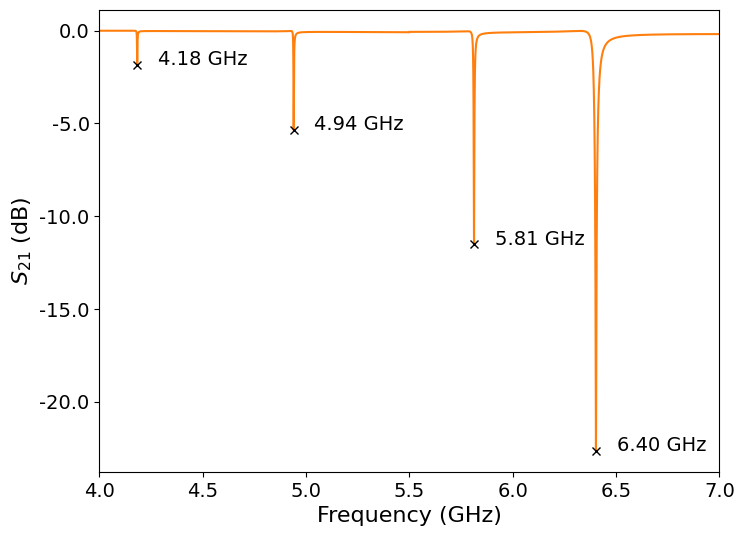

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)

# ax[0].plot(d['0p6-1-Ge-sub']['freq']*1e-9, d['0p6-1-Ge-sub']['amp'], color ='tab:orange')
# peak, _ = sig.find_peaks(-d['0p6-1-Ge-sub']['amp'], prominence = 0.1)
# f0 = d['0p6-1-Ge-sub']['freq'][peak]*1e-9
# ax[0].plot(d['0p6-1-Ge-sub']['freq'][peak]*1e-9, d['0p6-1-Ge-sub']['amp'][peak], 'x', color='black')
# ax[0].text(d['0p6-1-Ge-sub']['freq'][peak[0]]*1e-9+0.05, d['0p6-1-Ge-sub']['amp'][peak[0]]-0.1, f'{f0[0]:.2f} GHz', fontsize=10, color='black')
# ax[0].text(d['0p6-1-Ge-sub']['freq'][peak[1]]*1e-9+0.1, d['0p6-1-Ge-sub']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=10, color='black')
# ax[0].plot(d['0p6-2-Ge-sub']['freq']*1e-9, d['0p6-2-Ge-sub']['amp']+0.099, color ='tab:orange')
# # peak, _ = sig.find_peaks(-d['0p6-2-Ge-sub']['amp'], prominence = 0.01)
# # f0 = d['0p6-2-Ge-sub']['freq'][peak]*1e-9
# # ax.plot(d['0p6-2-Ge-sub']['freq'][peak]*1e-9, d['0p6-2-Ge-sub']['amp'][peak]+0.072, 'x', color='black')
# # ax.text(d['0p6-2-Ge-sub']['freq'][peak[0]]*1e-9+0.1, d['0p6-2-Ge-sub']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=10, color='black')
# ax[0].set_title('$\sigma = 100$mS/m', fontsize=18)
# # ax[0].set_xlabel('Frequency (GHz)')
# ax[0].set_xticklabels(labels = '',fontsize=14)


# ax[0].set_ylabel('$S_{21}$ (dB)', fontsize=16)
# ax[0].set_xlim(4, 7)

f0_ge = []


# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# plt.subplots_adjust(hspace=0.5)

ax.plot(d['0p6-1-sigma']['freq']*1e-9, d['0p6-1-sigma']['amp'], color ='tab:orange')
peak, _ = sig.find_peaks(-d['0p6-1-sigma']['amp'], prominence = 1)
f0 = d['0p6-1-sigma']['freq'][peak]*1e-9
f0_ge.append(f0[0])
f0_ge.append(f0[1])
ax.plot(d['0p6-1-sigma']['freq'][peak]*1e-9, d['0p6-1-sigma']['amp'][peak], 'x', color='black')
ax.text(d['0p6-1-sigma']['freq'][peak[0]]*1e-9+0.1, d['0p6-1-sigma']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=14, color='black')
ax.text(d['0p6-1-sigma']['freq'][peak[1]]*1e-9+0.1, d['0p6-1-sigma']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=14, color='black')

ax.plot(d['0p6-2-sigma']['freq']*1e-9, d['0p6-2-sigma']['amp']+0.072, color ='tab:orange')
peak, _ = sig.find_peaks(-d['0p6-2-sigma']['amp'], prominence = 1)
f0 = d['0p6-2-sigma']['freq'][peak]*1e-9
f0_ge.append(f0[0])
f0_ge.append(f0[1])
ax.plot(d['0p6-2-sigma']['freq'][peak]*1e-9, d['0p6-2-sigma']['amp'][peak]+0.072, 'x', color='black')
ax.text(d['0p6-2-sigma']['freq'][peak[0]]*1e-9+0.1, d['0p6-2-sigma']['amp'][peak[0]]+0.072, f'{f0[0]:.2f} GHz', fontsize=14, color='black')
ax.text(d['0p6-2-sigma']['freq'][peak[1]]*1e-9+0.1, d['0p6-2-sigma']['amp'][peak[1]]+0.072, f'{f0[1]:.2f} GHz', fontsize=14, color='black')
# peak, _ = sig.find_peaks(-d['0p6-2-Ge-sub']['amp'], prominence = 0.01)
# f0 = d['0p6-2-Ge-sub']['freq'][peak]*1e-9
# ax.plot(d['0p6-2-Ge-sub']['freq'][peak]*1e-9, d['0p6-2-Ge-sub']['amp'][peak]+0.072, 'x', color='black')
# ax.text(d['0p6-2-Ge-sub']['freq'][peak[0]]*1e-9+0.1, d['0p6-2-Ge-sub']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=10, color='black')
# ax.set_title('$\sigma = 1$mS/m', fontsize=18)
ax.set_xlabel('Frequency (GHz)', fontsize=16)
ax.set_ylabel('$S_{21}$ (dB)', fontsize=16)
ax.set_xlim(4, 7)
ax.set_yticklabels(labels = np.arange(-25,0.1,5),fontsize=14)
ax.set_xticklabels(labels = np.arange(4,7.1,0.5),fontsize=14)

# plt.savefig(r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\gonogo-pics\ge-subs.png', dpi=300)


<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:50: SyntaxWarning: invalid escape sequence '\s'
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\1688567321.py:15: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_title('$\sigma = 100$mS/m', fontsize=18)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\1688567321.py:50: SyntaxWarning: invalid escape sequence '\s'
  ax[1].set_title('$\sigma = 1$mS/m', fontsize=18)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\1688567321.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(labels = np.arange(-25,0.1,5),fontsize=14)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\1688567321.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLo

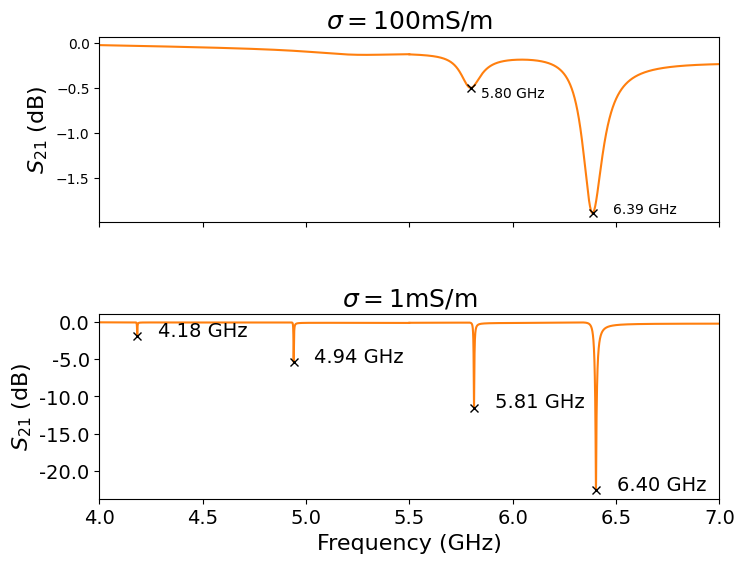

In [223]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)

ax[0].plot(d['0p6-1-Ge-sub']['freq']*1e-9, d['0p6-1-Ge-sub']['amp'], color ='tab:orange')
peak, _ = sig.find_peaks(-d['0p6-1-Ge-sub']['amp'], prominence = 0.1)
f0 = d['0p6-1-Ge-sub']['freq'][peak]*1e-9
ax[0].plot(d['0p6-1-Ge-sub']['freq'][peak]*1e-9, d['0p6-1-Ge-sub']['amp'][peak], 'x', color='black')
ax[0].text(d['0p6-1-Ge-sub']['freq'][peak[0]]*1e-9+0.05, d['0p6-1-Ge-sub']['amp'][peak[0]]-0.1, f'{f0[0]:.2f} GHz', fontsize=10, color='black')
ax[0].text(d['0p6-1-Ge-sub']['freq'][peak[1]]*1e-9+0.1, d['0p6-1-Ge-sub']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=10, color='black')
ax[0].plot(d['0p6-2-Ge-sub']['freq']*1e-9, d['0p6-2-Ge-sub']['amp']+0.099, color ='tab:orange')
# peak, _ = sig.find_peaks(-d['0p6-2-Ge-sub']['amp'], prominence = 0.01)
# f0 = d['0p6-2-Ge-sub']['freq'][peak]*1e-9
# ax.plot(d['0p6-2-Ge-sub']['freq'][peak]*1e-9, d['0p6-2-Ge-sub']['amp'][peak]+0.072, 'x', color='black')
# ax.text(d['0p6-2-Ge-sub']['freq'][peak[0]]*1e-9+0.1, d['0p6-2-Ge-sub']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=10, color='black')
ax[0].set_title('$\sigma = 100$mS/m', fontsize=18)
# ax[0].set_xlabel('Frequency (GHz)')
ax[0].set_xticklabels(labels = '',fontsize=14)


ax[0].set_ylabel('$S_{21}$ (dB)', fontsize=16)
ax[0].set_xlim(4, 7)

f0_ge = []


# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# plt.subplots_adjust(hspace=0.5)

ax[1].plot(d['0p6-1-sigma']['freq']*1e-9, d['0p6-1-sigma']['amp'], color ='tab:orange')
peak, _ = sig.find_peaks(-d['0p6-1-sigma']['amp'], prominence = 1)
f0 = d['0p6-1-sigma']['freq'][peak]*1e-9
f0_ge.append(f0[0])
f0_ge.append(f0[1])
ax[1].plot(d['0p6-1-sigma']['freq'][peak]*1e-9, d['0p6-1-sigma']['amp'][peak], 'x', color='black')
ax[1].text(d['0p6-1-sigma']['freq'][peak[0]]*1e-9+0.1, d['0p6-1-sigma']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=14, color='black')
ax[1].text(d['0p6-1-sigma']['freq'][peak[1]]*1e-9+0.1, d['0p6-1-sigma']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=14, color='black')

ax[1].plot(d['0p6-2-sigma']['freq']*1e-9, d['0p6-2-sigma']['amp']+0.072, color ='tab:orange')
peak, _ = sig.find_peaks(-d['0p6-2-sigma']['amp'], prominence = 1)
f0 = d['0p6-2-sigma']['freq'][peak]*1e-9
f0_ge.append(f0[0])
f0_ge.append(f0[1])
ax[1].plot(d['0p6-2-sigma']['freq'][peak]*1e-9, d['0p6-2-sigma']['amp'][peak]+0.072, 'x', color='black')
ax[1].text(d['0p6-2-sigma']['freq'][peak[0]]*1e-9+0.1, d['0p6-2-sigma']['amp'][peak[0]]+0.072, f'{f0[0]:.2f} GHz', fontsize=14, color='black')
ax[1].text(d['0p6-2-sigma']['freq'][peak[1]]*1e-9+0.1, d['0p6-2-sigma']['amp'][peak[1]]+0.072, f'{f0[1]:.2f} GHz', fontsize=14, color='black')
# peak, _ = sig.find_peaks(-d['0p6-2-Ge-sub']['amp'], prominence = 0.01)
# f0 = d['0p6-2-Ge-sub']['freq'][peak]*1e-9
# ax.plot(d['0p6-2-Ge-sub']['freq'][peak]*1e-9, d['0p6-2-Ge-sub']['amp'][peak]+0.072, 'x', color='black')
# ax.text(d['0p6-2-Ge-sub']['freq'][peak[0]]*1e-9+0.1, d['0p6-2-Ge-sub']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=10, color='black')
ax[1].set_title('$\sigma = 1$mS/m', fontsize=18)
ax[1].set_xlabel('Frequency (GHz)', fontsize=16)
ax[1].set_ylabel('$S_{21}$ (dB)', fontsize=16)
ax[1].set_xlim(4, 7)
ax[1].set_yticklabels(labels = np.arange(-25,0.1,5),fontsize=14)
ax[1].set_xticklabels(labels = np.arange(4,7.1,0.5),fontsize=14)

plt.savefig(r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\gonogo-pics\ge-subs.png', dpi=300)


C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\1884076324.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = np.arange(4,8.1, 0.5),fontsize=12)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\1884076324.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = np.arange(-5,0.1,1),fontsize=12)


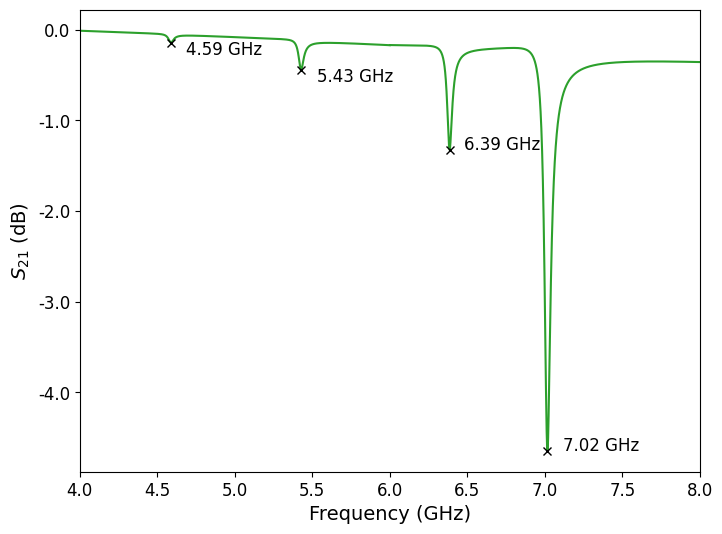

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)

f0_hetero_si = []

ax.plot(d['0p6-1-si-hetero']['freq']*1e-9, d['0p6-1-si-hetero']['amp'], color ='tab:green')
peak, _ = sig.find_peaks(-d['0p6-1-si-hetero']['amp'], prominence = 1)
f0 = d['0p6-1-si-hetero']['freq'][peak]*1e-9
f0_hetero_si.append(f0[0])
f0_hetero_si.append(f0[1])
ax.plot(d['0p6-1-si-hetero']['freq'][peak]*1e-9, d['0p6-1-si-hetero']['amp'][peak], 'x', color='black')
ax.text(d['0p6-1-si-hetero']['freq'][peak[0]]*1e-9+0.09, d['0p6-1-si-hetero']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=12, color='black')
ax.text(d['0p6-1-si-hetero']['freq'][peak[1]]*1e-9+0.1, d['0p6-1-si-hetero']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=12, color='black')
ax.plot(d['0p6-2-si-hetero']['freq']*1e-9, d['0p6-2-si-hetero']['amp']+0.13, color ='tab:green')
peak, _ = sig.find_peaks(-d['0p6-2-si-hetero']['amp'], prominence = 0.01)
f0 = d['0p6-2-si-hetero']['freq'][peak]*1e-9
f0_hetero_si.append(f0[0])
f0_hetero_si.append(f0[1])

ax.plot(d['0p6-2-si-hetero']['freq'][peak]*1e-9, d['0p6-2-si-hetero']['amp'][peak]+0.13, 'x', color='black')
ax.text(d['0p6-2-si-hetero']['freq'][peak[0]]*1e-9+0.1, d['0p6-2-si-hetero']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=12, color='black')
ax.text(d['0p6-2-si-hetero']['freq'][peak[1]]*1e-9+0.1, d['0p6-2-si-hetero']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=12, color='black')
# ax.set_title('Ge heterostructure Si substrate')
ax.set_xlabel('Frequency (GHz)', fontsize=14)
ax.set_xticklabels(labels = np.arange(4,8.1, 0.5),fontsize=12)
ax.set_ylabel('$S_{21}$ (dB)', fontsize=14)
ax.set_yticklabels(labels = np.arange(-5,0.1,1),fontsize=12)
ax.set_xlim(4, 8)

plt.savefig(r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\gonogo-pics\si-hetero.png', dpi=300)


C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_20884\1435684199.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels = np.arange(-6,0.1,1),fontsize=14)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_20884\1435684199.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = np.arange(4,7.1,0.5),fontsize=14)


[Text(4.0, 0, '4.0'),
 Text(4.5, 0, '4.5'),
 Text(5.0, 0, '5.0'),
 Text(5.5, 0, '5.5'),
 Text(6.0, 0, '6.0'),
 Text(6.5, 0, '6.5'),
 Text(7.0, 0, '7.0')]

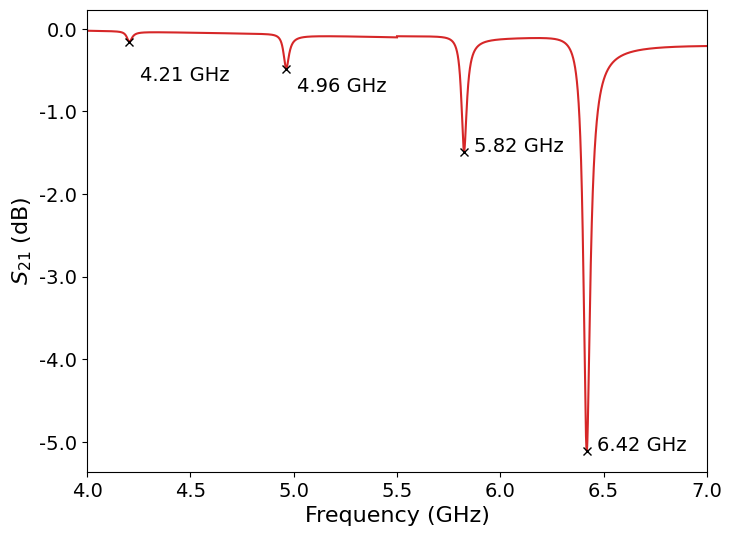

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)
f0_ge_hetero = []

ax.plot(d['0p6-1-ge-hetero-sigma']['freq']*1e-9, d['0p6-1-ge-hetero-sigma']['amp'], color ='tab:red')
peak, _ = sig.find_peaks(-d['0p6-1-ge-hetero-sigma']['amp'], prominence = 1)
f0 = d['0p6-1-ge-hetero-sigma']['freq'][peak]*1e-9
f0_ge_hetero.append(f0[0])
f0_ge_hetero.append(f0[1])
ax.plot(d['0p6-1-ge-hetero-sigma']['freq'][peak]*1e-9, d['0p6-1-ge-hetero-sigma']['amp'][peak], 'x', color='black')
ax.text(d['0p6-1-ge-hetero-sigma']['freq'][peak[0]]*1e-9+0.05, d['0p6-1-ge-hetero-sigma']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=14, color='black')
ax.text(d['0p6-1-ge-hetero-sigma']['freq'][peak[1]]*1e-9+0.05, d['0p6-1-ge-hetero-sigma']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=14, color='black')

ax.plot(d['0p6-2-ge-hetero-sigma']['freq']*1e-9, d['0p6-2-ge-hetero-sigma']['amp']+0.072, color ='tab:red')
peak, _ = sig.find_peaks(-d['0p6-2-ge-hetero-sigma']['amp'], prominence = 0.01)
f0 = d['0p6-2-ge-hetero-sigma']['freq'][peak]*1e-9
f0_ge.append(f0[0])
f0_ge.append(f0[1])
ax.plot(d['0p6-2-ge-hetero-sigma']['freq'][peak]*1e-9, d['0p6-2-ge-hetero-sigma']['amp'][peak]+0.072, 'x', color='black')
ax.text(d['0p6-2-ge-hetero-sigma']['freq'][peak[0]]*1e-9+0.05, d['0p6-2-ge-hetero-sigma']['amp'][peak[0]]-0.395, f'{f0[0]:.2f} GHz', fontsize=14, color='black')
ax.text(d['0p6-2-ge-hetero-sigma']['freq'][peak[1]]*1e-9+0.05, d['0p6-2-ge-hetero-sigma']['amp'][peak[1]]-0.195, f'{f0[1]:.2f} GHz', fontsize=14, color='black')

# ax.set_title('$\sigma = 1$mS/m', fontsize=18)
ax.set_xlabel('Frequency (GHz)', fontsize=16)
ax.set_ylabel('$S_{21}$ (dB)', fontsize=16)
ax.set_xlim(4, 7)
ax.set_yticklabels(labels = np.arange(-6,0.1,1),fontsize=14)
ax.set_xticklabels(labels = np.arange(4,7.1,0.5),fontsize=14)

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\3181828562.py:15: SyntaxWarning: invalid escape sequence '\s'
  ax[0].set_title('$\sigma = 100$mS/m', fontsize=18)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\3181828562.py:47: SyntaxWarning: invalid escape sequence '\s'
  ax[1].set_title('$\sigma = 1$mS/m', fontsize=18)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\3181828562.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(labels = np.arange(-3,0.1,0.5),fontsize=14)
C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_8148\3181828562.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

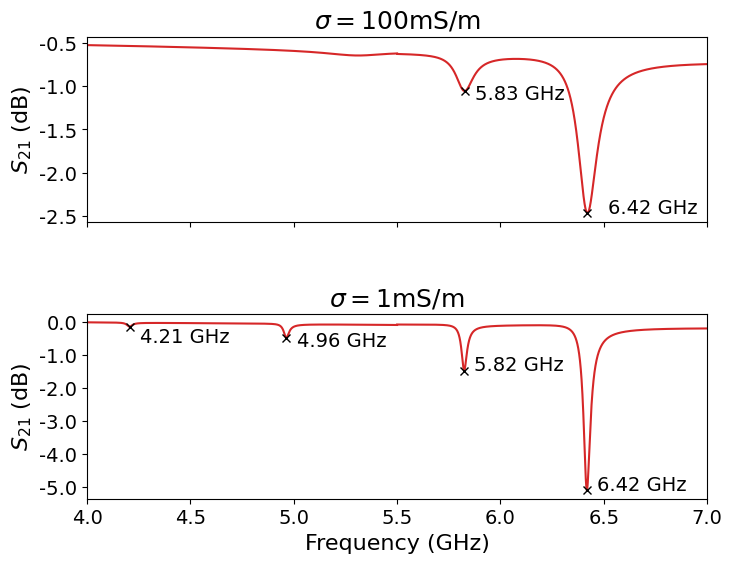

In [225]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plt.subplots_adjust(hspace=0.5)

ax[0].plot(d['0p6-1-ge-hetero']['freq']*1e-9, d['0p6-1-ge-hetero']['amp'], color ='tab:red')
peak, _ = sig.find_peaks(-d['0p6-1-ge-hetero']['amp'], prominence = 0.1)
f0 = d['0p6-1-ge-hetero']['freq'][peak]*1e-9
ax[0].plot(d['0p6-1-ge-hetero']['freq'][peak]*1e-9, d['0p6-1-ge-hetero']['amp'][peak], 'x', color='black')
ax[0].text(d['0p6-1-ge-hetero']['freq'][peak[0]]*1e-9+0.05, d['0p6-1-ge-hetero']['amp'][peak[0]]-0.1, f'{f0[0]:.2f} GHz', fontsize=14, color='black')
ax[0].text(d['0p6-1-ge-hetero']['freq'][peak[1]]*1e-9+0.1, d['0p6-1-ge-hetero']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=14, color='black')
ax[0].plot(d['0p6-2-ge-hetero']['freq']*1e-9, d['0p6-2-ge-hetero']['amp']+0.099, color ='tab:red')
# peak, _ = sig.find_peaks(-d['0p6-2-Ge-sub']['amp'], prominence = 0.01)
# f0 = d['0p6-2-Ge-sub']['freq'][peak]*1e-9
# ax.plot(d['0p6-2-Ge-sub']['freq'][peak]*1e-9, d['0p6-2-Ge-sub']['amp'][peak]+0.072, 'x', color='black')
# ax.text(d['0p6-2-Ge-sub']['freq'][peak[0]]*1e-9+0.1, d['0p6-2-Ge-sub']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=10, color='black')
ax[0].set_title('$\sigma = 100$mS/m', fontsize=18)
# ax[0].set_xlabel('Frequency (GHz)')
ax[0].set_xticklabels(labels = '',fontsize=14)
ax[0].set_yticklabels(labels = np.arange(-3,0.1,0.5),fontsize=14)

ax[0].set_ylabel('$S_{21}$ (dB)', fontsize=16)
ax[0].set_xlim(4, 7)

f0_ge_hetero = []


# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# plt.subplots_adjust(hspace=0.5)

ax[1].plot(d['0p6-1-ge-hetero-sigma']['freq']*1e-9, d['0p6-1-ge-hetero-sigma']['amp'], color ='tab:red')
peak, _ = sig.find_peaks(-d['0p6-1-ge-hetero-sigma']['amp'], prominence = 1)
f0 = d['0p6-1-ge-hetero-sigma']['freq'][peak]*1e-9
f0_ge_hetero.append(f0[0])
f0_ge_hetero.append(f0[1])
ax[1].plot(d['0p6-1-ge-hetero-sigma']['freq'][peak]*1e-9, d['0p6-1-ge-hetero-sigma']['amp'][peak], 'x', color='black')
ax[1].text(d['0p6-1-ge-hetero-sigma']['freq'][peak[0]]*1e-9+0.05, d['0p6-1-ge-hetero-sigma']['amp'][peak[0]], f'{f0[0]:.2f} GHz', fontsize=14, color='black')
ax[1].text(d['0p6-1-ge-hetero-sigma']['freq'][peak[1]]*1e-9+0.05, d['0p6-1-ge-hetero-sigma']['amp'][peak[1]], f'{f0[1]:.2f} GHz', fontsize=14, color='black')

ax[1].plot(d['0p6-2-ge-hetero-sigma']['freq']*1e-9, d['0p6-2-ge-hetero-sigma']['amp']+0.072, color ='tab:red')
peak, _ = sig.find_peaks(-d['0p6-2-ge-hetero-sigma']['amp'], prominence = 0.01)
f0 = d['0p6-2-ge-hetero-sigma']['freq'][peak]*1e-9
f0_ge.append(f0[0])
f0_ge.append(f0[1])
ax[1].plot(d['0p6-2-ge-hetero-sigma']['freq'][peak]*1e-9, d['0p6-2-ge-hetero-sigma']['amp'][peak]+0.072, 'x', color='black')
ax[1].text(d['0p6-2-ge-hetero-sigma']['freq'][peak[0]]*1e-9+0.05, d['0p6-2-ge-hetero-sigma']['amp'][peak[0]]-0.395, f'{f0[0]:.2f} GHz', fontsize=14, color='black')
ax[1].text(d['0p6-2-ge-hetero-sigma']['freq'][peak[1]]*1e-9+0.05, d['0p6-2-ge-hetero-sigma']['amp'][peak[1]]-0.195, f'{f0[1]:.2f} GHz', fontsize=14, color='black')

ax[1].set_title('$\sigma = 1$mS/m', fontsize=18)
ax[1].set_xlabel('Frequency (GHz)', fontsize=16)
ax[1].set_ylabel('$S_{21}$ (dB)', fontsize=16)
ax[1].set_xlim(4, 7)
ax[1].set_yticklabels(labels = np.arange(-6,0.1,1),fontsize=14)
ax[1].set_xticklabels(labels = np.arange(4,7.1,0.5),fontsize=14)

plt.savefig(r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\gonogo-pics\ge-hetero.png', dpi=300)


## Cap sim


In [121]:
import pandas as pd
path = r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\Sim-data-Al\ansys\new-diel'
file_list = os.listdir(path)
# print(file_list)
C0_ge = []
C0_si= []
C0_hetero_si = []
C0_hetero_ge = []
Cc_ge = []
Cc_si = []
Cc_hetero_si = []
Cc_hetero_ge = []

for file in file_list:
    name = file.split('.')
    if name[0] == 'c0-si':
        C0_si = -1*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])
    elif name[0] == 'cc-si':
        Cc_si = -1*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])
    elif name[0] == 'c0-ge-subs':
        C0_ge = -1*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])
    elif name[0] == 'cc-ge-subs':
        Cc_ge = -1*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])
    elif name[0] == 'c0-hetero-si':
        C0_hetero_si = -1*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])
    elif name[0] == 'cc-hetero-si':
        Cc_hetero_si = -1*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])
    elif name[0] == 'c0-hetero-ge':
        C0_hetero_ge = -1*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])
    elif name[0] == 'cc-hetero-ge':
        Cc_hetero_ge = -1*np.array(pd.read_csv(os.path.join(path, file)).values[0][1:])
    

In [ ]:
def Qc(f0, C0, Cc):
    return 1e15*(C0+Cc)/(2*np.pi*1e9*f0*50*Cc**2)

Qc_ge = Qc(np.array(f0_ge), C0_ge, Cc_ge)
Qc_si = Qc(np.array(f0_si), C0_si, Cc_si)
Qc_hetero_si = Qc(np.array(f0_hetero_si), C0_hetero_si, Cc_hetero_si)
# Qc_hetero_ge = Qc(np.array(f0_hetero_ge), C0_hetero_ge, Cc_hetero_ge)

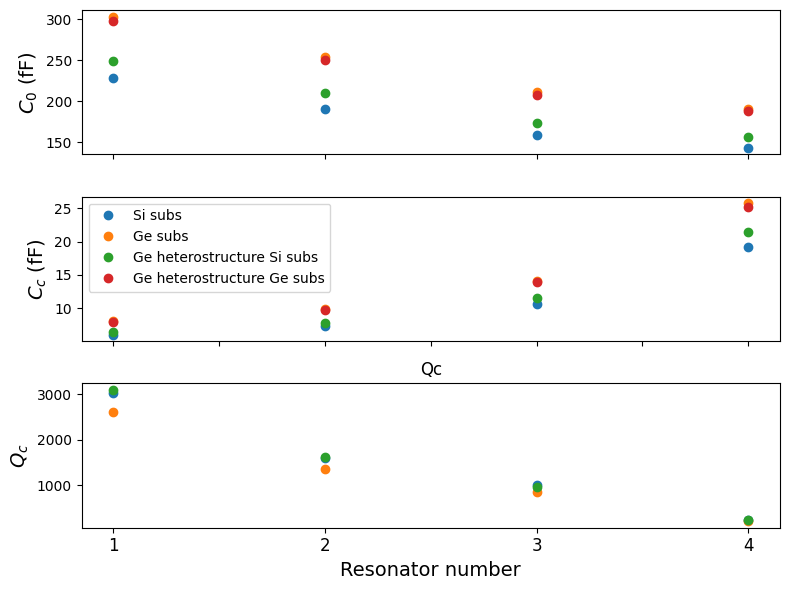

In [179]:
fig, ax = plt.subplots(3,1,figsize=(8, 6))

ax[0].plot(C0_si,'o', label='Si subs')
ax[0].plot(C0_ge, 'o',label='Ge subs')
ax[0].plot(C0_hetero_si, 'o', label='Ge heterostructure Si subs' )
ax[0].plot(C0_hetero_ge,'o', label='Ge heterostructure Ge subs')
# ax[0].set_title('$C_0$')
# ax[0].set_xlabel('Resonator number')
ax[0].set_xticks(np.arange(len(C0_si)))
ax[0].set_xticklabels('')
ax[0].set_ylabel('$C_0$ (fF)', fontsize=14)
# ax[0].legend()
ax[1].plot(Cc_si,'o', label='Si subs')
ax[1].plot(Cc_ge, 'o',label='Ge subs')
ax[1].plot(Cc_hetero_si, 'o',label='Ge heterostructure Si subs')
ax[1].plot(Cc_hetero_ge,'o', label='Ge heterostructure Ge subs')
# ax[1].set_title('$C_c$')
# ax[1].set_xticks(np.arange(len(C0_si)))
ax[1].set_xticklabels('')
# ax[1].set_xlabel('Resonator number')
ax[1].set_ylabel('$C_c$ (fF)', fontsize=14)
ax[1].legend()
ax[2].plot(Qc_si,'o', label='Si subs')
ax[2].plot(Qc_ge, 'o',label='Ge subs')
ax[2].plot(Qc_hetero_si, 'o',label='Ge heterostructure Si subs')
# ax[2].plot(Qc_hetero_ge,'o', label='Ge heterostructure Ge subs')
ax[2].set_title('Qc')
ax[2].set_xticks(np.arange(len(C0_si))) 
ax[2].set_xticklabels(np.arange(1, len(C0_si)+1), fontsize=12)
ax[2].set_xlabel('Resonator number', fontsize=14)
ax[2].set_ylabel('$Q_c$', fontsize=14)

plt.tight_layout()
plt.savefig(r'C:\Users\LocalAdmin\OneDrive - Delft University of Technology\gonogo-pics\cap_sim.png', dpi=300)


In [6]:
import pandas as pd
# Load the data ; 0th dimension for 0p6, 1st for 0p3
C0_0p6 = []
C0_0p3 = []
Cc_0p6 = []
Cc_0p3 = []
C0_ge = []
Cc_ge = []
for file in file_list[:-2]:
    name = file.split('.')
    if name[1] == 'csv':
        d = pd.read_csv(os.path.join(path,file))
        if name [0][0:2] == 'c0':
            if name[0][-1] == '6':
                print(name)
                C0_0p6 = -1*np.array(d.values[0][1:])
            elif name[0][-1] == '3':
                print(name)
                C0_0p3 = -1*np.array(d.values[0][1:])
            elif name[0][-1]== 'e':
                C0_ge = -1*np.array(d.values[0][1:])
        elif name[0][0:2] == 'cc':
            if name[0][-1] == '6':
                print(name)
                Cc_0p6 = -1*np.array(d.values[0][1:])
            elif name[0][-1] == '3':
                print(name)
                Cc_0p3 = -1*np.array(d.values[0][1:])
            elif name[0][-1]== 'e':
                Cc_ge = -1*np.array(d.values[0][1:])

print(C0_0p6)
print(C0_0p3)
print(Cc_0p6)
print(Cc_0p3)
print(C0_ge)
print(Cc_ge)


['c0-0p3', 'csv']
['c0-0p6', 'csv']
['cc-0p3', 'csv']
['cc-0p6', 'csv']
[226.62439328 189.87921755 157.97328313 142.28272196]
[202.19848849 180.99944855 147.4741042  132.55380876]
[ 6.05268197  7.2994568  10.55836593 19.18854841]
[ 5.84695264  7.09925527 10.37442126 18.90144838]
[250.55605914 209.18869635 174.38944843 157.06324454]
[ 6.4207344   7.80772817 11.49557818 21.87051198]


In [8]:
# print nicely 
print(f'0.6um C0: {C0_0p6}')
print(f'0.3um C0: {C0_0p3}')
print(f'0.6um Cc: {Cc_0p6}')
print(f'0.3um Cc: {Cc_0p3}')
# print(f'0.6um f0: {f0_0p6}')
# print(f'0.3um f0: {f0_0p3}')
print(f'0.6um C0 ge: {C0_ge}')
print(f'0.6um Cc ge: {Cc_ge}')





0.6um C0: [226.62439328 189.87921755 157.97328313 142.28272196]
0.3um C0: [202.19848849 180.99944855 147.4741042  132.55380876]
0.6um Cc: [ 6.05268197  7.2994568  10.55836593 19.18854841]
0.3um Cc: [ 5.84695264  7.09925527 10.37442126 18.90144838]
0.6um C0 ge: [250.55605914 209.18869635 174.38944843 157.06324454]
0.6um Cc ge: [ 6.4207344   7.80772817 11.49557818 21.87051198]


In [13]:
#Qc
def Qc(f0, C0, Cc):
    return 1e15*(C0+Cc)/(2*np.pi*1e9*f0*50*Cc**2)

Qc_0p6 = Qc(f0_0p6, C0_0p6, Cc_0p6)
Qc_0p3 = Qc(f0_0p3, C0_0p3, Cc_0p3)
print(f'0.6um Qc: {Qc_0p6}')
print(f'0.3um Qc: {Qc_0p3}')
Qc_ge = Qc(f0_0p6, C0_ge, Cc_ge)
print(f'0.6um Qc ge: {Qc_ge}')

0.6um Qc: [4205.12638497 2075.10793655  720.50106319  189.78192594]
0.3um Qc: [3753.68755357 1981.95806571  688.9999301   175.38031258]
0.6um Qc ge: [4127.10637279 1996.02070828  670.39280488  161.88932481]
